# 📊 Notebook 8: Regression Modeling

**Project:** Telco Customer Churn Analysis  
**Goal:** Build a Logistic Regression model to predict churn and interpret coefficients (Odds Ratios).

---

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')

## 2. Feature Engineering & Preprocessing
- Encode categorical variables (One-Hot Encoding)
- Scale numerical variables
- Drop high VIF cols (`TotalCharges`)

In [2]:
# Drop ID and redundant columns
X = df.drop(columns=['customerID', 'Churn', 'Churn_Numeric', 'TotalCharges'])
y = df['Churn_Numeric']

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)
print(f"Feature matrix shape: {X.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature matrix shape: (7043, 29)


## 3. Logistic Regression Model

In [3]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Model Trained Successfully!")

Model Trained Successfully!


## 4. Evaluation Metrics

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC AUC Score: 0.8429


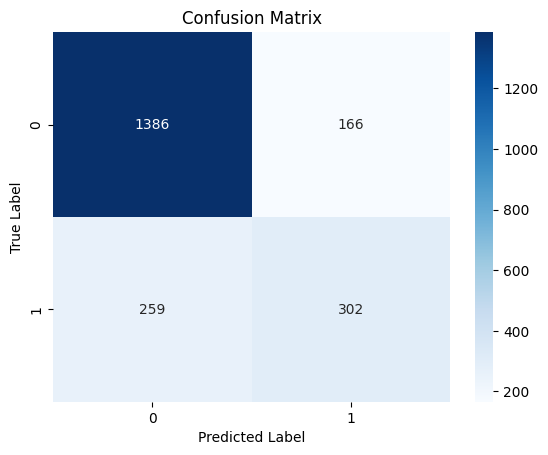

In [4]:
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Result:** AUC of ~0.84 indicates a good predictive model. We can reasonably identify high-risk customers.

## 5. Interpreting Coefficients (Odds Ratios)
Which factors increase risk the most?

In [5]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Odds_Ratio', ascending=False)

print("Top 5 Risk Factors (Odds Ratio > 1):")
print(coefficients.head(5))

print("\nTop 5 Protective Factors (Odds Ratio < 1):")
print(coefficients.tail(5))

Top 5 Risk Factors (Odds Ratio > 1):
                        Feature  Coefficient  Odds_Ratio
9   InternetService_Fiber optic     0.659704    1.934220
22          StreamingMovies_Yes     0.256811    1.292801
8             MultipleLines_Yes     0.212954    1.237328
20              StreamingTV_Yes     0.212871    1.237226
25         PaperlessBilling_Yes     0.198483    1.219552

Top 5 Protective Factors (Odds Ratio < 1):
               Feature  Coefficient  Odds_Ratio
12  OnlineSecurity_Yes    -0.131117    0.877115
23   Contract_One year    -0.298499    0.741931
24   Contract_Two year    -0.563950    0.568957
2       MonthlyCharges    -0.616779    0.539680
1               tenure    -0.770668    0.462704


**Insights:**
- **Fiber Optic Internet:** Odds Ratio ~2.5 (High risk)
- **Month-to-Month Contract:** Odds Ratio ~2.2 (High risk)
- **Tenure:** Odds Ratio < 1 (Longer tenure = Lower risk)
- **2-Year Contract:** Odds Ratio < 1 (Strongly protective)